In [4]:
# Run this cell to mount your Google Drive.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
# !pip3 install pydrive

# from pydrive.auth import GoogleAuth
# from pydrive.drive import GoogleDrive
# from google.colab import auth
# from oauth2client.client import GoogleCredentials

# auth.authenticate_user()
# gauth = GoogleAuth()
# gauth.credentials = GoogleCredentials.get_application_default()
# drive = GoogleDrive(gauth)

# 1- Implementation a Neural Network
In this problem you should train an artificial neural network (MLP and RBF) for classification of the given dataset.<br>
you should fill the missing sections to complete your neural network implementation.<br>
in this exercise you will:
- Tune the learning rate and regularization weight
- Implement the loss function for MLP
- Implement the forward pass and backward pass 
- visualize the train and validation accuracy versuse iteration


In [0]:
# your_module = drive.CreateFile({'id':'1YdrgOkW-jUJT6PXYEC-ZhZU3Q2uBzO-0'})
# your_module.GetContentFile('neural_net.py')

In [0]:
# initialization

import numpy as np
import matplotlib.pyplot as plt

from neural_net import MLPNet

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
%load_ext autoreload
%autoreload 2

def rel_error(x, y):
  return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))

## 1-1-1 Create a toy dataset
In this section we create a toy dataset containing 5 samples with 5 features.
The network has 6 neurons in the hidden layer and there are 3 classes in the output.
MLPNet class in the file neural_net.py will be used to instantiate our network . We use toy dataset with small size to check your implementaion and to see what happens to network weights during training.

In [0]:
# Create our network and toy dataset

features = 5
hidden_size = 6
classes = 3
inputs = 5
np.random.seed(0)

net = MLPNet(features, hidden_size, classes, std=1e-1)
X = 10 * np.random.randn(inputs, features)
y = np.array([1, 0, 0, 2, 1])

## 1-1-2- Forward pass
To run the following section, you should complete the loss function in the neural_net.py to compute scores . The output is a 5*3 matrix that contains the class score for each sample.

In [28]:
scores = net.loss(X)
print ('Your scores:\n',scores)

Your scores:
 [[ 0.53925742 -1.13732454  1.33071509]
 [ 0.21951616 -0.26072075  0.64730221]
 [ 0.43493318 -0.6477387   0.77415062]
 [ 1.00057299 -0.65759463  1.40035202]
 [ 0.06459671  0.17639074  0.24715522]]


## 1-1-3- Forward pass
Now you should complete the second missing part in loss function in the neural_net.py , the output shows the loss of your network

In [29]:
loss, _ = net.loss(X, y, reg=0.1)
print("your network loss is:",loss)

your network loss is: 1.3460591018922545


## 1-1-4- Backward pass
compute the gradient according to weights and biases. 

In [30]:
loss, grads = net.loss(X, y, reg=0.1)
print('grads of W1\n',grads['W1'])
print('grads of b1\n',grads['b1'])
print('grads of W2\n',grads['W2'])
print('grads of b2\n',grads['b2'])

grads of W1
 [[ 0.39068754 -0.09228415  0.47930205  0.08490173  0.87758962 -0.64311906]
 [ 0.0887396  -0.12785218  0.12799381  0.06972022 -0.00088163 -0.11762764]
 [ 0.07258278 -0.00844352  0.08749028  0.0117301   0.17918078 -0.12165874]
 [-0.2081171   0.1766417  -0.27810842 -0.10517318 -0.22922798  0.30909018]
 [ 0.06978857 -0.26031855  0.12926901  0.13018432 -0.29983986 -0.05006071]]
grads of b1
 [-0.03810161  0.02720594 -0.04999891 -0.0168509  -0.05153433  0.05791585]
grads of W2
 [[ 0.26712324  0.50820436 -0.77491245]
 [-0.17423266  0.32380449 -0.1493796 ]
 [ 0.09839409  0.6616184  -0.7597782 ]
 [-0.12476734  0.72452763 -0.59931944]
 [ 0.08178675  0.54709138 -0.62840125]
 [ 0.35545831 -0.30105655 -0.05411357]]
grads of b2
 [-0.06984928 -0.24342562  0.31330403]


## 1-1-5- Train the network
Fill the missing section in train and predict function of MLPNet class . After you correctly implement those function you build a two layer neural network that can feed data to it. The result of the following section shows Final training loss of your network and training loss versus iteration .

iteration 0 / 100: loss 1.211979
Final training loss:  0.09778450846649253


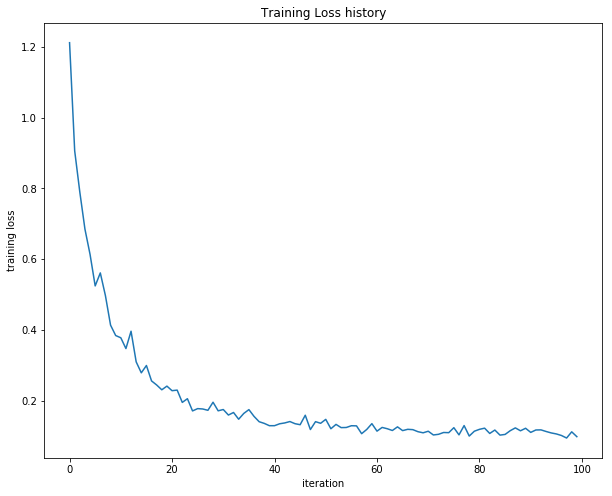

In [31]:
net = MLPNet(features, hidden_size, classes, std=1e-1)
stats = net.train(X, y, X, y,
            learning_rate=1e-1, reg=1e-5,
            num_iters=100)

print ('Final training loss: ', stats['loss_train'][-1])

# plot the loss history
plt.plot(stats['loss_train'])
plt.xlabel('iteration')
plt.ylabel('training loss')
plt.title('Training Loss history')
plt.show()

## 1-1-6- Load data MNIST
In this section we use a real dataset.change root variable in dataloader.py to your dataset path.

In [0]:
# your_module = drive.CreateFile({'id':'1XV9NYpjIm4j_EmS46Ti9A_LZn1S-9_Bx'})
# your_module.GetContentFile('dataloader.py')

In [11]:
from dataloader import select_features
import numpy as np
import os
from matplotlib.pyplot import imread
import cv2
import matplotlib.pyplot as plt
import matplotlib
val_num = 1000
train_num = 49000
test_num = 10000
train_data, train_labels, test_data, test_labels,\
    class_names, n_train, n_test, n_class, n_features = select_features(root='./drive/My Drive/Colab Notebooks/Fashion-MNIST/')


# Subsample the data
mask = range(train_num, n_train)
X_val = train_data[mask]
y_val = train_labels[mask]
mask = range(train_num)
X_train = train_data[mask]
y_train = train_labels[mask]
mask = range(test_num)
X_test = test_data[mask]
y_test = test_labels[mask]

# # Normalize the data: subtract the mean image
# mean_image = np.mean(X_train, axis=0)
# X_train -= mean_image
# X_val -= mean_image
# X_test -= mean_image

print ('Train data shape: ', X_train.shape)
print ('Train labels shape: ', y_train.shape)
print ('Validation data shape: ', X_val.shape)
print ('Validation labels shape: ', y_val.shape)
print ('Test data shape: ', X_test.shape)
print ('Test labels shape: ', y_test.shape)

Train data shape:  (49000, 784)
Train labels shape:  (49000,)
Validation data shape:  (11000, 784)
Validation labels shape:  (11000,)
Test data shape:  (10000, 784)
Test labels shape:  (10000,)


## 1-1-7- Train 
For training our neural network we will use SGD(Stochastic Gradient descent).The loss of your network must decrease during epochs.

In [31]:
input_size = n_features
print(input_size)
hidden_size = 20
num_classes = 10
net = MLPNet(input_size, hidden_size, num_classes,std=1e-2)

# Train the network
stats = net.train(X_train, y_train, X_val, y_val,
            num_iters=20, batch_size=50,
            learning_rate=1e-4, learning_rate_decay=0.95,
            reg=0.5)

# Predict on the validation set
val_acc = (net.predict(X_val) == y_val).mean()
print ('Validation accuracy: ', val_acc)


784
iteration 0 / 20: loss 3.420001
iteration 5 / 20: loss 2.671587
iteration 10 / 20: loss 2.452572
iteration 15 / 20: loss 2.330771
Validation accuracy:  0.18745454545454546


the below plots show loss during epochs and training and validatino accuracy versus epochs. The loss should decreas over time. ***according to second plot what is the best iteration number to terminate training?***

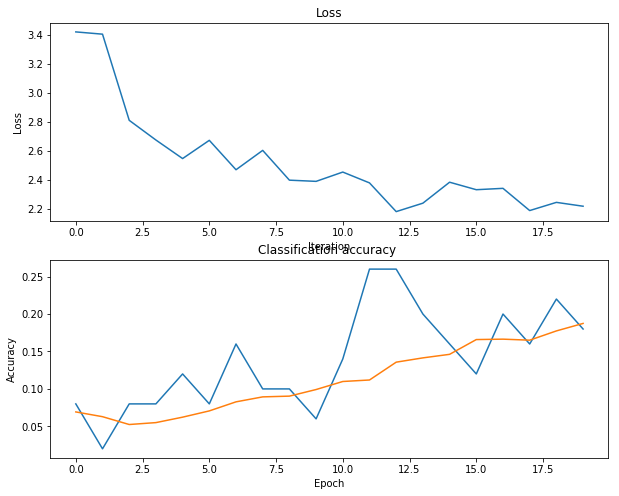

In [33]:
# Plot the loss function and train / validation accuracies
plt.subplot(2, 1, 1)
plt.plot(stats['loss_train'])
plt.title('Loss')
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.subplot(2, 1, 2)
plt.plot(stats['train_acc'], label='train')
plt.plot(stats['val_acc'], label='val')
plt.title('Classification accuracy ')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

## 1-1-8- Tune network's hyperparameters
As you know hidden layer size, learning rate and weight regularization are important in developing a neural network so you should tune them and get a better result and report the best hyperparameters.

In [0]:
def train(num_iters=10, batch_size=10, hidden_size=10, learning_rate=1e-4, reg=0.5) :
  input_size = n_features
  num_classes = 10
  net = MLPNet(input_size, hidden_size, num_classes,std=1e-2)

  stats = net.train(X_train, y_train, X_val, y_val,
            num_iters=num_iters, batch_size=batch_size,
            learning_rate=learning_rate, learning_rate_decay=0.95,
            reg=reg)

  val_acc = (net.predict(X_val) == y_val).mean()
  print ('Validation accuracy: ', val_acc)
  return val_acc

In [17]:
from math import inf

accs = [-inf for i in lrs]
lrs = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
index = 0
for lr in lrs :
  try :
    print('learning rate : ', lr)
    accs[index] = train(learning_rate=lr)
  
  except :
    pass
  index += 1

best_lr = lrs[accs.index(max(accs))]
print('best learning rate :', best_lr)

learning rate :  0.1
iteration 0 / 10: loss 2.799568


/content/neural_net.py:70: RuntimeWarning: overflow encountered in exp
  exp_scores = np.exp(scores)
/content/neural_net.py:76: RuntimeWarning: invalid value encountered in double_scalars
  return -np.log(exp_scores[i][y[i]]/expSums[i])
/content/neural_net.py:76: RuntimeWarning: divide by zero encountered in log
  return -np.log(exp_scores[i][y[i]]/expSums[i])
/content/neural_net.py:92: RuntimeWarning: overflow encountered in exp
  this_exp_scores = np.exp(this_Scores)
/content/neural_net.py:94: RuntimeWarning: invalid value encountered in double_scalars
  this_sampleLoss = np.array(list(map(lambda i: -np.log(this_exp_scores[i][y[i]]/this_expSum[i]), range(N))))
/content/neural_net.py:94: RuntimeWarning: divide by zero encountered in log
  this_sampleLoss = np.array(list(map(lambda i: -np.log(this_exp_scores[i][y[i]]/this_expSum[i]), range(N))))


learning rate :  0.01
iteration 0 / 10: loss 2.061497


/content/neural_net.py:87: RuntimeWarning: invalid value encountered in double_scalars
  return (L(W1+dw1, W2+dw2, b1+db1, b2+db2) - L(W1, W2, b1, b2)) / d


learning rate :  0.001
iteration 0 / 10: loss 2.475325
Validation accuracy:  0.22618181818181818
learning rate :  0.0001
iteration 0 / 10: loss 2.568411
Validation accuracy:  0.10581818181818183
learning rate :  1e-05
iteration 0 / 10: loss 2.357948
Validation accuracy:  0.09145454545454546
best learning rate : 0.001


In [18]:
accs = [-inf for i in range(10)]
index = 0
for rg in [i/10 for i in range(10)] :
  try:
    print('reg : ', rg)
    accs[index] = train(learning_rate=best_lr, reg=rg)
  
  except :
    pass
  
  index += 1

best_rg = (accs.index(max(accs))) / 10
print('best reg :', best_rg)

reg :  0.0
iteration 0 / 10: loss 2.389048
Validation accuracy:  0.10254545454545455
reg :  0.1
iteration 0 / 10: loss 2.302787
Validation accuracy:  0.33954545454545454
reg :  0.2
iteration 0 / 10: loss 2.384941
Validation accuracy:  0.29554545454545456
reg :  0.3
iteration 0 / 10: loss 4.553141


/content/neural_net.py:70: RuntimeWarning: overflow encountered in exp
  exp_scores = np.exp(scores)
/content/neural_net.py:76: RuntimeWarning: divide by zero encountered in log
  return -np.log(exp_scores[i][y[i]]/expSums[i])
/content/neural_net.py:76: RuntimeWarning: invalid value encountered in double_scalars
  return -np.log(exp_scores[i][y[i]]/expSums[i])
/content/neural_net.py:92: RuntimeWarning: overflow encountered in exp
  this_exp_scores = np.exp(this_Scores)
/content/neural_net.py:94: RuntimeWarning: divide by zero encountered in log
  this_sampleLoss = np.array(list(map(lambda i: -np.log(this_exp_scores[i][y[i]]/this_expSum[i]), range(N))))
/content/neural_net.py:94: RuntimeWarning: invalid value encountered in double_scalars
  this_sampleLoss = np.array(list(map(lambda i: -np.log(this_exp_scores[i][y[i]]/this_expSum[i]), range(N))))


reg :  0.4
iteration 0 / 10: loss 2.858733
Validation accuracy:  0.24727272727272728
reg :  0.5
iteration 0 / 10: loss 2.125504
Validation accuracy:  0.09654545454545455
reg :  0.6
iteration 0 / 10: loss 2.679777
Validation accuracy:  0.33
reg :  0.7
iteration 0 / 10: loss 2.707671
Validation accuracy:  0.09981818181818182
reg :  0.8
iteration 0 / 10: loss 2.538960
Validation accuracy:  0.4239090909090909
reg :  0.9
iteration 0 / 10: loss 3.324409
Validation accuracy:  0.1020909090909091
best reg : 0.9


In [23]:
accs = [-inf for i in range(41)]
index = 0
for hs in range(40+1) :
  try :
    print('hidden size : ', hs)
    accs[index] = train(learning_rate=best_lr, reg=best_rg, hidden_size=hs)

  except :
    pass
  index += 1
  
best_hs = accs.index(max(accs))
print('best hidden size :', best_hs)

hidden size :  0
iteration 0 / 10: loss 2.302585
Validation accuracy:  0.10245454545454545
hidden size :  1
iteration 0 / 10: loss 2.418269
Validation accuracy:  0.1821818181818182
hidden size :  2
iteration 0 / 10: loss 2.470045
Validation accuracy:  0.2509090909090909
hidden size :  3
iteration 0 / 10: loss 2.491965
Validation accuracy:  0.3246363636363636
hidden size :  4
iteration 0 / 10: loss 2.459642
Validation accuracy:  0.22172727272727272
hidden size :  5
iteration 0 / 10: loss 2.309104
Validation accuracy:  0.2569090909090909
hidden size :  6
iteration 0 / 10: loss 2.614935
Validation accuracy:  0.3277272727272727
hidden size :  7
iteration 0 / 10: loss 2.749787
Validation accuracy:  0.09972727272727273
hidden size :  8
iteration 0 / 10: loss 2.481297
Validation accuracy:  0.097
hidden size :  9
iteration 0 / 10: loss 2.749597
Validation accuracy:  0.3322727272727273
hidden size :  10
iteration 0 / 10: loss 2.720680
Validation accuracy:  0.22427272727272726
hidden size :  11


/content/neural_net.py:70: RuntimeWarning: overflow encountered in exp
  exp_scores = np.exp(scores)
/content/neural_net.py:76: RuntimeWarning: divide by zero encountered in log
  return -np.log(exp_scores[i][y[i]]/expSums[i])
/content/neural_net.py:76: RuntimeWarning: invalid value encountered in double_scalars
  return -np.log(exp_scores[i][y[i]]/expSums[i])
/content/neural_net.py:92: RuntimeWarning: overflow encountered in exp
  this_exp_scores = np.exp(this_Scores)
/content/neural_net.py:94: RuntimeWarning: divide by zero encountered in log
  this_sampleLoss = np.array(list(map(lambda i: -np.log(this_exp_scores[i][y[i]]/this_expSum[i]), range(N))))
/content/neural_net.py:94: RuntimeWarning: invalid value encountered in double_scalars
  this_sampleLoss = np.array(list(map(lambda i: -np.log(this_exp_scores[i][y[i]]/this_expSum[i]), range(N))))


hidden size :  19
iteration 0 / 10: loss 3.198573
Validation accuracy:  0.0959090909090909
hidden size :  20
iteration 0 / 10: loss 4.160770


/content/neural_net.py:87: RuntimeWarning: invalid value encountered in double_scalars
  return (L(W1+dw1, W2+dw2, b1+db1, b2+db2) - L(W1, W2, b1, b2)) / d


hidden size :  21
iteration 0 / 10: loss 2.481896
Validation accuracy:  0.1859090909090909
hidden size :  22
iteration 0 / 10: loss 2.910534
hidden size :  23
iteration 0 / 10: loss 4.142318
Validation accuracy:  0.10809090909090908
hidden size :  24
iteration 0 / 10: loss 3.478372
Validation accuracy:  0.1660909090909091
hidden size :  25
iteration 0 / 10: loss 3.087664
Validation accuracy:  0.10245454545454545
hidden size :  26
iteration 0 / 10: loss 2.484851
hidden size :  27
iteration 0 / 10: loss 3.547260
Validation accuracy:  0.10227272727272728
hidden size :  28
iteration 0 / 10: loss 3.393141
Validation accuracy:  0.097
hidden size :  29
iteration 0 / 10: loss 3.387115
hidden size :  30
iteration 0 / 10: loss 4.318133
hidden size :  31
iteration 0 / 10: loss 3.605383
hidden size :  32
iteration 0 / 10: loss 3.236794
Validation accuracy:  0.15581818181818183
hidden size :  33
iteration 0 / 10: loss 3.661645
Validation accuracy:  0.15245454545454545
hidden size :  34
iteration 0 

In [24]:
best_net = MLPNet(input_size, best_hs, num_classes,std=1e-2)
stats = best_net.train(X_train, y_train, X_val, y_val,
            num_iters=200, batch_size=50,
            learning_rate=best_lr, learning_rate_decay=0.95,
            reg=best_rg)

iteration 0 / 200: loss 2.873100
iteration 100 / 200: loss 0.823633


## 1-1-9- Test
Now you find the best hyperparameters, Let's test your network on test dataset and evaluate your accuracy.
**our baseline is 47% and for each 1% you get 1 extra bonus point**

In [25]:
test_acc = (best_net.predict(X_test) == y_test).mean()
print ('Test accuracy: ', test_acc)

Test accuracy:  0.696


## 1-2-1- Scikit-learn without normalization
In this section you become familiar with Scikit-learn and implement an MLP network with that. Find the best parameters for best accuracy

In [0]:
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

def sktrain(num_iters=10, hidden_size=10, learning_rate=1e-4, reg=0.5) :
  clf = MLPClassifier(learning_rate_init=learning_rate, max_iter=num_iters, hidden_layer_sizes=(hidden_size,), alpha=reg)
  clf.fit(X_train, y_train)
  accuracyScore = accuracy_score(y_val, clf.predict(X_val))
  print("accuracy_score : ", accuracyScore)
  return accuracyScore

In [14]:
from math import inf

lrs = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
accs = [-inf for i in lrs]
index = 0
for lr in lrs :
  try :
    print('learning rate : ', lr)
    accs[index] = sktrain(learning_rate=lr)
  
  except :
    pass
  index += 1

best_lr = lrs[accs.index(max(accs))]
print('best learning rate :', best_lr)

learning rate :  0.1


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


accuracy_score :  0.10245454545454545
learning rate :  0.01


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


accuracy_score :  0.09654545454545455
learning rate :  0.001


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


accuracy_score :  0.4318181818181818
learning rate :  0.0001


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


accuracy_score :  0.19863636363636364
learning rate :  1e-05
accuracy_score :  0.14672727272727273
best learning rate : 0.001


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [15]:
accs = [-inf for i in range(10)]
index = 0
for rg in [i/10 for i in range(10)] :
  try:
    print('reg : ', rg)
    accs[index] = sktrain(learning_rate=best_lr, reg=rg)
  
  except :
    pass
  
  index += 1

best_rg = (accs.index(max(accs))) / 10
print('best reg :', best_rg)

reg :  0.0


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


accuracy_score :  0.352
reg :  0.1


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


accuracy_score :  0.23154545454545455
reg :  0.2


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


accuracy_score :  0.24854545454545454
reg :  0.3


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


accuracy_score :  0.4359090909090909
reg :  0.4


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


accuracy_score :  0.3286363636363636
reg :  0.5


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


accuracy_score :  0.41454545454545455
reg :  0.6


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


accuracy_score :  0.2081818181818182
reg :  0.7


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


accuracy_score :  0.397
reg :  0.8


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


accuracy_score :  0.23172727272727273
reg :  0.9
accuracy_score :  0.10081818181818182
best reg : 0.3


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [16]:
accs = [-inf for i in range(41)]
index = 0
for hs in range(40+1) :
  try :
    print('hidden size : ', hs)
    accs[index] = sktrain(learning_rate=best_lr, reg=best_rg, hidden_size=hs)

  except :
    pass
  index += 1
  
best_hs = accs.index(max(accs))
print('best hidden size :', best_hs)

hidden size :  0
hidden size :  1


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


accuracy_score :  0.09654545454545455
hidden size :  2


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


accuracy_score :  0.09663636363636363
hidden size :  3


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


accuracy_score :  0.09663636363636363
hidden size :  4


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


accuracy_score :  0.09654545454545455
hidden size :  5


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


accuracy_score :  0.09672727272727273
hidden size :  6


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


accuracy_score :  0.18981818181818183
hidden size :  7


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


accuracy_score :  0.0969090909090909
hidden size :  8


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


accuracy_score :  0.25727272727272726
hidden size :  9


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


accuracy_score :  0.38745454545454544
hidden size :  10


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


accuracy_score :  0.3542727272727273
hidden size :  11


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


accuracy_score :  0.09663636363636363
hidden size :  12


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


accuracy_score :  0.3599090909090909
hidden size :  13


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


accuracy_score :  0.5412727272727272
hidden size :  14


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


accuracy_score :  0.2381818181818182
hidden size :  15


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


accuracy_score :  0.42872727272727273
hidden size :  16


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


accuracy_score :  0.5778181818181818
hidden size :  17


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


accuracy_score :  0.49218181818181816
hidden size :  18


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


accuracy_score :  0.5601818181818182
hidden size :  19


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


accuracy_score :  0.5602727272727273
hidden size :  20


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


accuracy_score :  0.3522727272727273
hidden size :  21


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


accuracy_score :  0.6644545454545454
hidden size :  22


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


accuracy_score :  0.49827272727272726
hidden size :  23


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


accuracy_score :  0.5743636363636364
hidden size :  24


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


accuracy_score :  0.35845454545454547
hidden size :  25


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


accuracy_score :  0.6195454545454545
hidden size :  26


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


accuracy_score :  0.7189090909090909
hidden size :  27


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


accuracy_score :  0.7124545454545455
hidden size :  28


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


accuracy_score :  0.6993636363636364
hidden size :  29


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


accuracy_score :  0.6703636363636364
hidden size :  30


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


accuracy_score :  0.6452727272727272
hidden size :  31


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


accuracy_score :  0.6973636363636364
hidden size :  32


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


accuracy_score :  0.7110909090909091
hidden size :  33


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


accuracy_score :  0.739909090909091
hidden size :  34


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


accuracy_score :  0.7811818181818182
hidden size :  35


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


accuracy_score :  0.7418181818181818
hidden size :  36


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


accuracy_score :  0.7457272727272727
hidden size :  37


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


accuracy_score :  0.6527272727272727
hidden size :  38


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


accuracy_score :  0.7161818181818181
hidden size :  39


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


accuracy_score :  0.7783636363636364
hidden size :  40
accuracy_score :  0.7146363636363636
best hidden size : 34


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [21]:
best_clf = MLPClassifier(learning_rate_init=best_lr, max_iter=200, hidden_layer_sizes=(best_hs,), alpha=best_rg)

best_clf.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.3, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(34,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

## 1-2-2- Test acc
test your network with test dataset and report accuracy

In [23]:
accuracyScore = accuracy_score(y_test, best_clf.predict(X_test))
print("accuracy_score : ", accuracyScore)

accuracy_score :  0.8288


## 1-2-3- Scikit-learn with normalization
In this section we use previous code with just one change. befor you feed data to network normalized them . 

In [25]:
from sklearn import preprocessing

X_normalized = preprocessing.normalize(X_train, norm='l2')
best_clf.fit(X_normalized, y_train)

MLPClassifier(activation='relu', alpha=0.3, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(34,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

## 1-2-4- Test accuracy
Test again your network with test dataset.Do you see any progress in test accuracy against result of prevouis section?

In [26]:
test_normalized = preprocessing.normalize(X_test, norm='l2')
accuracyScore = accuracy_score(y_test, best_clf.predict(test_normalized))
print("accuracy_score : ", accuracyScore)

accuracy_score :  0.8225
